

# **Problem Statement**

**To predict the fare of the taxi ride using Random Forest given pickup and drop-off locations, the pickup timestamp, and the passenger count**

**Data Understanding**

unique_id= A unique identifier or key for each record in the dataset

date_time_of_pickup= The time when the ride started

longitude_of_pickup= Longitude of the taxi ride pickup point

latitude_of_pickup= Latitude of the taxi ride pickup point

longitude__of_dropoff= Longitude of the taxi ride dropoff point

latitude_of_dropoff= Latitude of the taxi ride dropoff

point no_of_passenger= count of the passengers during the ride

Amount= (target variable) dollar amount of the cost of the taxi ride

In [ ]:
# Necessary imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [ ]:
#Loading of Dataset
Data=pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv')

In [ ]:
Data.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


Data Preparation

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [ ]:
Data['unique_id'].unique()

array(['26:21.0', '52:16.0', '35:00.0', ..., '38:13.0', '04:12.0',
       '53:22.0'], dtype=object)

In [ ]:
Data['date_time_of_pickup'].unique()

array(['2009-06-15 17:26:21 UTC', '2010-01-05 16:52:16 UTC',
       '2011-08-18 00:35:00 UTC', ..., '2011-01-30 04:53:00 UTC',
       '2012-11-06 07:09:00 UTC', '2010-01-13 08:13:14 UTC'], dtype=object)

In [ ]:
Data['no_of_passenger'].unique()

array([1, 2, 3, 6, 5, 4, 0])

In [ ]:
Data.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [ ]:
Data.replace('?', np.nan, inplace=True)


In [ ]:
Data.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

Since we have "amount" as the target variable therefore, we have listed its statistical properties.

In [ ]:
Data['amount'].describe()

count    50000.000000
mean        11.364171
std          9.685557
min         -5.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: amount, dtype: float64

We will drop the 'amount' which are less than 2.5 because price in NYC can't be less than this.

In [ ]:
index_names=Data[Data['amount']<2.5].index

In [ ]:
index_names

Int64Index([2039, 2486, 2780, 10002, 13032, 27891, 28839, 36722, 42337, 47302], dtype='int64')

In [ ]:
#Dropping the rows which have amount less than 2.5 because in New York, price can't be less than 2,5 dollar.
Data.drop(index_names, inplace=True)

Outlier Detection in the Dataset

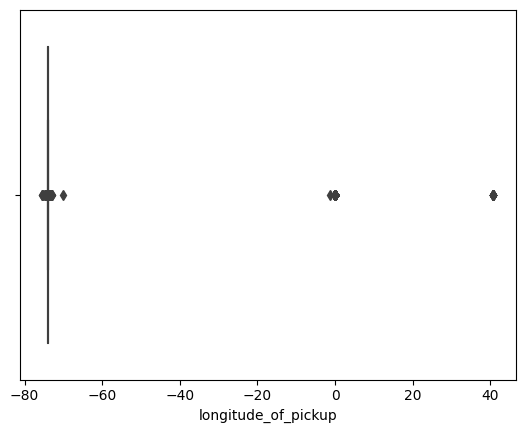

In [ ]:
sns.boxplot(data=Data, x='longitude_of_pickup', hue='amount')
plt.show()

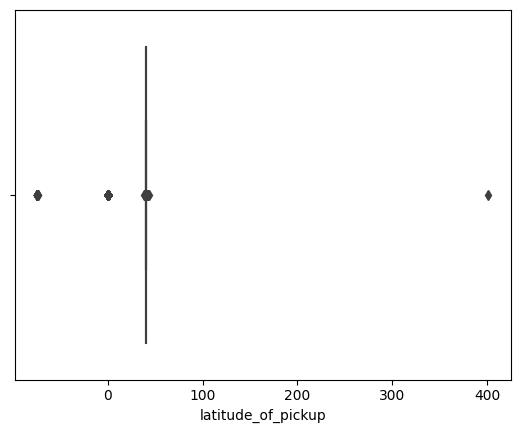

In [ ]:
sns.boxplot(data=Data, x='latitude_of_pickup', hue='amount')
plt.show()

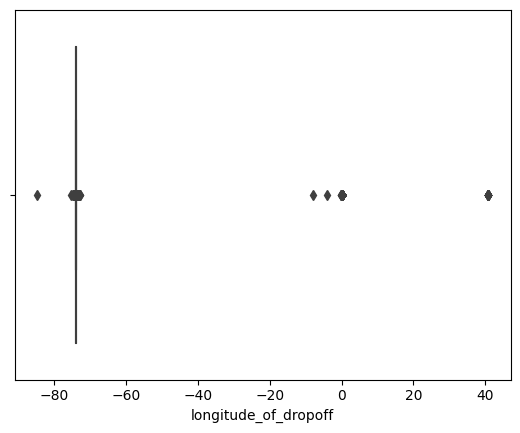

In [ ]:
sns.boxplot(data=Data, x='longitude_of_dropoff', hue='amount')
plt.show()

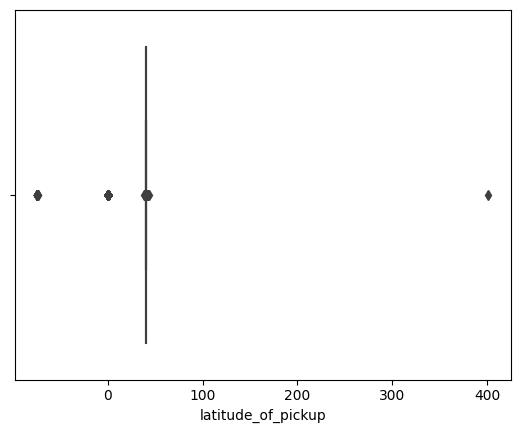

In [ ]:
sns.boxplot(data=Data, x='latitude_of_pickup', hue='amount')
plt.show()

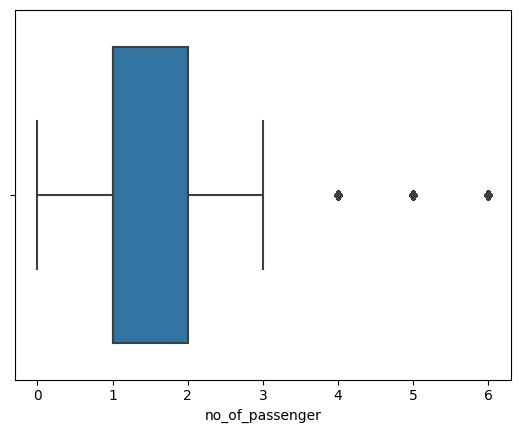

In [ ]:
sns.boxplot(data=Data, x='no_of_passenger', hue='amount')
plt.show()

In [ ]:
Data.describe(percentiles = [0.01,.02,.03,.04,.05,.1,.25,.4,.5,.75,.9,.95,.96,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,40%,50%,75%,90%,95%,96%,98%,99%,max
amount,49990.0,11.366813,9.684697,2.500000,3.300000,3.500000,3.700000,4.000000,4.100000,4.500000,6.000000,7.300000,8.500000,12.500000,20.500000,30.500000,33.566400,46.500000,52.000000,200.000000
longitude_of_pickup,49990.0,-72.509468,10.394880,-75.423848,-74.014436,-74.010456,-74.008734,-74.007742,-74.006816,-74.002780,-73.992062,-73.985837,-73.981840,-73.967155,-73.950996,-73.871348,-73.862870,-73.137393,0.000000,40.783472
latitude_of_pickup,49990.0,39.933598,6.225469,-74.006893,0.000000,40.578523,40.645443,40.681107,40.702132,40.717985,40.734883,40.746855,40.752679,40.767360,40.779778,40.787795,40.790614,40.799604,40.807129,401.083332
longitude_of_dropoff,49990.0,-72.505803,10.403539,-84.654241,-74.015120,-74.011755,-74.009840,-74.008284,-74.007275,-74.002710,-73.991152,-73.984217,-73.980082,-73.963588,-73.944750,-73.873280,-73.864201,-73.434436,0.000000,40.851027
latitude_of_dropoff,49990.0,39.926903,6.012677,-74.006377,0.000000,40.569767,40.646891,40.672764,40.686076,40.713277,40.734375,40.747609,40.753373,40.768166,40.782897,40.794074,40.798798,40.810249,40.832503,43.415190
no_of_passenger,49990.0,1.667914,1.289250,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,5.000000,5.000000,5.000000,6.000000,6.000000


In [ ]:
Data["X1"] = Data["latitude_of_pickup"]
Data["X2"] = Data["latitude_of_dropoff"]
Data["Y1"] = Data["longitude_of_pickup"]
Data["Y2"] = Data["longitude_of_dropoff"]

In [ ]:
Data['Distance_Travelled']= np.sqrt((np.square(Data['X1']-Data['X2']))+(np.square(Data['Y1']-Data['Y2'])))


In [ ]:
Data['Distance_Travelled'].describe()


count    49990.000000
mean         0.189575
std          3.838982
min          0.000000
25%          0.012475
50%          0.021502
75%          0.038681
max        360.304405
Name: Distance_Travelled, dtype: float64

In [ ]:
Data['Distance_Travelled'].describe(percentiles = [0.01,.02,.03,.04,.05,.1,.25,.4,.5,.75,.9,.95,.96,.98,.99]).T

count    49990.000000
mean         0.189575
std          3.838982
min          0.000000
1%           0.000000
2%           0.000000
3%           0.000019
4%           0.002763
5%           0.004374
10%          0.007360
25%          0.012475
40%          0.017534
50%          0.021502
75%          0.038681
90%          0.070274
95%          0.112406
96%          0.122447
98%          0.195029
99%          0.228219
max        360.304405
Name: Distance_Travelled, dtype: float64

In [ ]:
Q3=0.0386
Q1=0.0124
IQR=Q3-Q1


In [ ]:
print(Q1-1.5*IQR)
print(Q3+1.5*IQR)

-0.0269
0.0779


In [ ]:
Data_new=Data.drop(columns=['latitude_of_pickup','latitude_of_dropoff','longitude_of_pickup','longitude_of_dropoff'])

In [ ]:
Data_new[["date","Time","Zone"]]=Data_new["date_time_of_pickup"].str.split(pat=" ",n=-1 , expand=True)
#splitting the date_time_of_pickup in separate columns.

In [ ]:
Data_2 = Data_new.copy()

In [ ]:
Data_2["amount"] = np.where(Data_2["amount"]>=52, 52, Data_2["amount"])
Data_2["no_of_passenger"] = np.where(Data_2["no_of_passenger"]>=5, 4, Data_2["no_of_passenger"])
Data_2["Distance_Travelled"] = np.where(Data_2["Distance_Travelled"]>=0.228218, 0.228218, Data_2["Distance_Travelled"])
#Outlier Treatment

In [ ]:
Data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49990 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   unique_id            49990 non-null  object 
 1   amount               49990 non-null  float64
 2   date_time_of_pickup  49990 non-null  object 
 3   no_of_passenger      49990 non-null  int64  
 4   X1                   49990 non-null  float64
 5   X2                   49990 non-null  float64
 6   Y1                   49990 non-null  float64
 7   Y2                   49990 non-null  float64
 8   Distance_Travelled   49990 non-null  float64
 9   date                 49990 non-null  object 
 10  Time                 49990 non-null  object 
 11  Zone                 49990 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 5.0+ MB


In [ ]:
Data_2['date']

0        2009-06-15
1        2010-01-05
2        2011-08-18
3        2012-04-21
4        2010-03-09
            ...    
49995    2013-06-12
49996    2015-06-22
49997    2011-01-30
49998    2012-11-06
49999    2010-01-13
Name: date, Length: 49990, dtype: object

In [ ]:
#Changig the type from object to datetime.
Data_2["date"] = pd.to_datetime(Data_2["date"])
Data_2["date_time_of_pickup"] = pd.to_datetime(Data_2["date_time_of_pickup"])


In [ ]:
#Extracting some features from date_time_of_pickup
Data_2["hours"] = Data_2["date_time_of_pickup"].dt.hour
Data_2["min"] = Data_2["date_time_of_pickup"].dt.minute
Data_2["second"] = Data_2["date_time_of_pickup"].dt.second
Data_2["year"] = Data_2["date_time_of_pickup"].dt.year
Data_2["day_of_the_month"] =Data_2["date_time_of_pickup"].dt.day



In [ ]:
def time_of_day(x):
    if x in range(6,12):
        return "Morning"
    elif x in range(12,17):
        return "Afternoon"
    elif x in range(17,21):
        return "Evening"
    else:
        return "Night"

In [ ]:
Data_2["time_of_day"] = Data_2["hours"].apply(time_of_day)

In [ ]:
Data_2['time_of_day']

0          Evening
1        Afternoon
2            Night
3            Night
4          Morning
           ...    
49995        Night
49996      Evening
49997        Night
49998      Morning
49999      Morning
Name: time_of_day, Length: 49990, dtype: object

In [ ]:
Data_2["day"] = Data_2["date_time_of_pickup"].dt.day_name()
Data_2["day_no"] = Data_2["date_time_of_pickup"].dt.weekday

In [ ]:
Data_2['day']

0           Monday
1          Tuesday
2         Thursday
3         Saturday
4          Tuesday
           ...    
49995    Wednesday
49996       Monday
49997       Sunday
49998      Tuesday
49999    Wednesday
Name: day, Length: 49990, dtype: object

In [ ]:
Data_2['day_no']

0        0
1        1
2        3
3        5
4        1
        ..
49995    2
49996    0
49997    6
49998    1
49999    2
Name: day_no, Length: 49990, dtype: int64

In [ ]:
# Remove latitude and longtiude outliers
Data_2 = Data_2.loc[Data_2['X1'].between(40, 42)]
Data_2 = Data_2.loc[Data_2['Y1'].between(-75, -72)]
Data_2 = Data_2.loc[Data_2['X2'].between(40, 42)]
Data_2 = Data_2.loc[Data_2['Y2'].between(-75, -72)]


In [ ]:
Data_2.shape[0]
# these are the new number of observations.


48944

In [ ]:
def minkowski_distance(x1, x2, y1, y2, p):
    return ((abs(x2 - x1) ** p) + (abs(y2 - y1)) ** p) ** (1 / p)

In [ ]:
Data_2['manhattan_d'] = minkowski_distance(Data_2['Y1'],
                                       Data_2['Y2'],
                                       Data_2['X1'],
                                       Data_2['X2'], 1)

EDA PROCESS

<ipython-input-45-8b9306aad8a4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data_2['amount']);


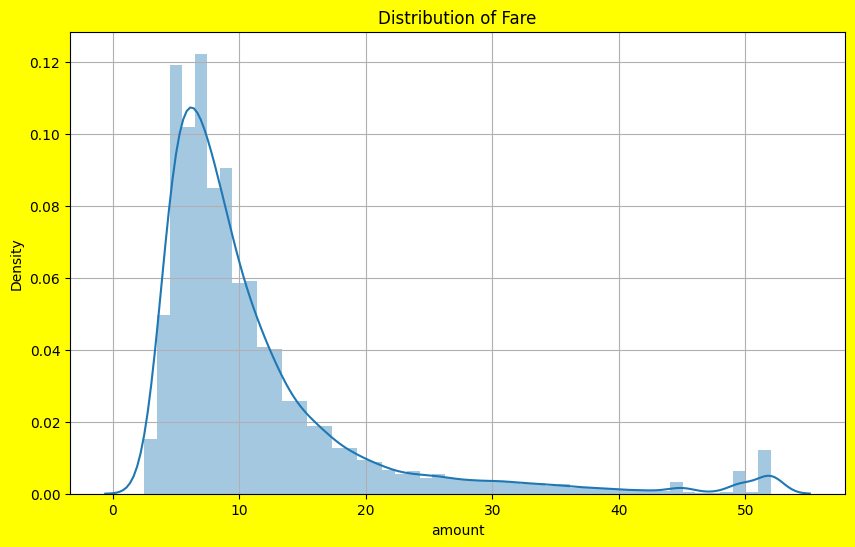

In [ ]:
plt.figure(figsize = (10, 6),facecolor="yellow")
sns.distplot(Data_2['amount']);
plt.title('Distribution of Fare')
plt.grid()


**We plotted the distribution of the amount/ fare and it can be seen from the above plot that the distribution is right skewed and the amount of skewness is very high. Also, it can be seen that the peak is observed in the amount range of [0,20] which indicates that the individuals prefer not to use taxi services for long distances because travelling long distances imply paying higher fare.**

In [ ]:
Data_2.pivot_table(index='hours', columns='year', values="amount",aggfunc="mean")

year,2009,2010,2011,2012,2013,2014,2015
hours,,,,,,,
0,10.678237,10.121852,10.915584,11.478135,12.148226,14.608251,15.289630
1,10.275422,10.288832,10.638158,12.199597,13.024562,12.030086,13.037660
2,9.840268,9.470056,9.548521,11.545342,12.980162,12.839934,12.097746
3,10.136232,10.726230,10.589063,11.645033,12.169224,14.546777,13.224000
4,12.457700,13.559684,13.739362,13.183133,14.231809,13.722024,15.000667
5,10.614853,13.714394,13.147191,16.088506,17.725429,18.025904,16.122424
6,11.429930,12.329623,10.714620,10.332278,14.648882,14.061630,12.165395
7,9.445274,8.854509,10.825000,10.845704,12.398034,12.673885,12.713262
8,9.987515,9.436103,9.895224,10.368153,10.857440,11.927181,12.648141


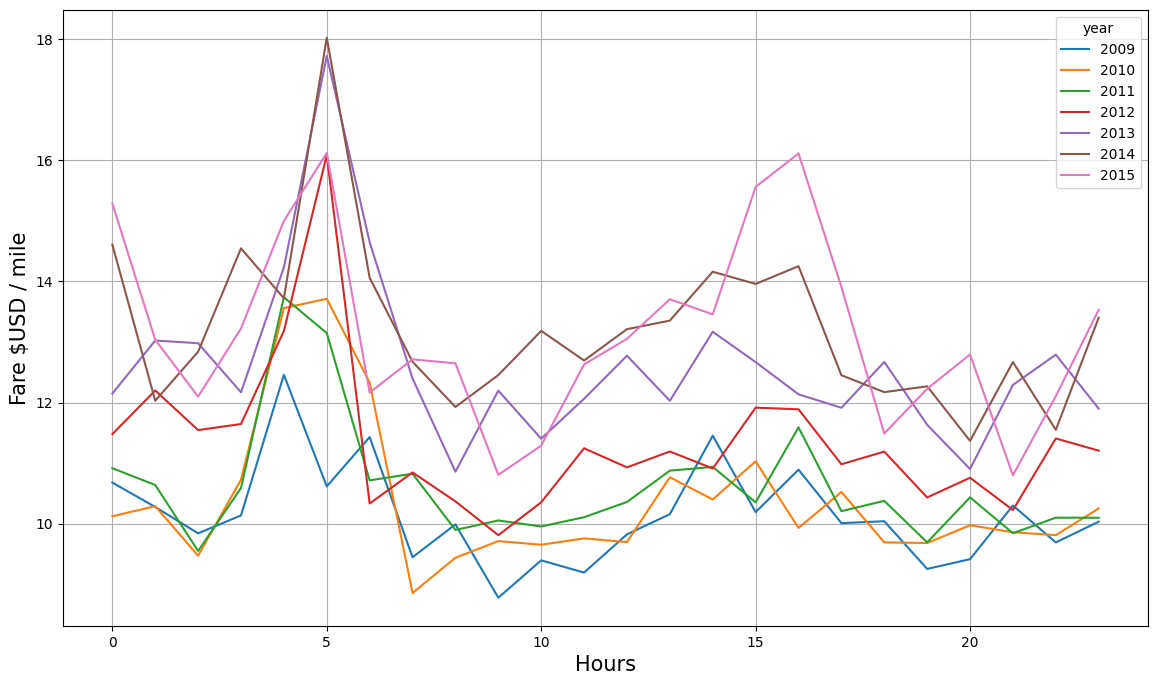

In [ ]:
Data_2.pivot_table(index='hours', columns='year', values="amount",aggfunc="mean").plot(figsize=(14,8))
plt.xlabel("Hours",fontsize=(15))
plt.ylabel('Fare $USD / mile',fontsize=(15))
plt.grid()


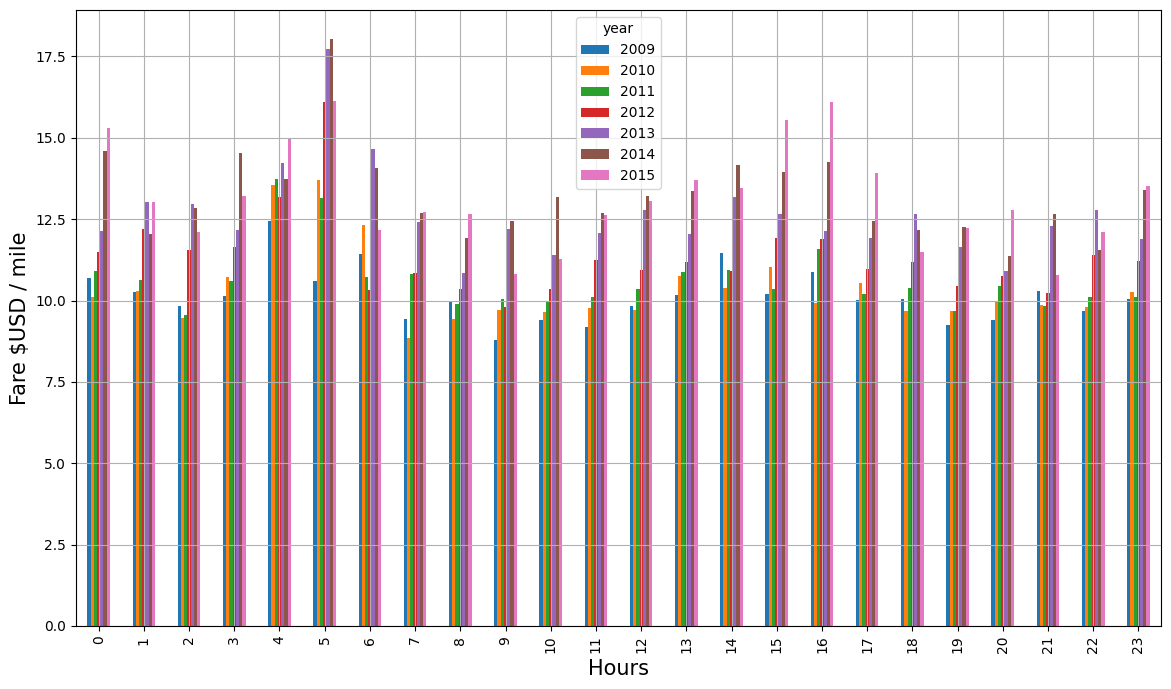

In [ ]:
Data_2.pivot_table(index='hours', columns='year', values="amount",aggfunc="mean").plot(figsize=(14,8), kind='bar')
plt.xlabel("Hours",fontsize=(15))
plt.ylabel('Fare $USD / mile',fontsize=(15))
plt.grid()

**For different years, this graph displays the link between fare/mile and hour. Each crooked(which is not straight) represents has some ascend between 5am and 7am., which is often the commencement of business hours, therefore a hike in fare can be expected.**

In [ ]:
Data_2.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,X1,X2,Y1,Y2,Distance_Travelled,date,...,Zone,hours,min,second,year,day_of_the_month,time_of_day,day,day_no,manhattan_d
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,40.721319,40.712278,-73.844311,-73.841610,0.009436,2009-06-15,...,UTC,17,26,21,2009,15,Evening,Monday,0,0.011742
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,40.711303,40.782004,-74.016048,-73.979268,0.079696,2010-01-05,...,UTC,16,52,16,2010,5,Afternoon,Tuesday,1,0.107481
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,40.761270,40.750562,-73.982738,-73.991242,0.013674,2011-08-18,...,UTC,0,35,0,2011,18,Night,Thursday,3,0.019212
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,40.733143,40.758092,-73.987130,-73.991567,0.025340,2012-04-21,...,UTC,4,30,42,2012,21,Night,Saturday,5,0.029386
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,40.768008,40.783762,-73.968095,-73.956655,0.019470,2010-03-09,...,UTC,7,51,0,2010,9,Morning,Tuesday,1,0.027194


In [ ]:
Data_2.groupby(Data_2["time_of_day"]).agg({"amount":["mean"]})

,amount
,mean
time_of_day,
Afternoon,11.729643
Evening,10.865916
Morning,10.858767
Night,11.494612


Text(0, 0.5, 'Average Fare')

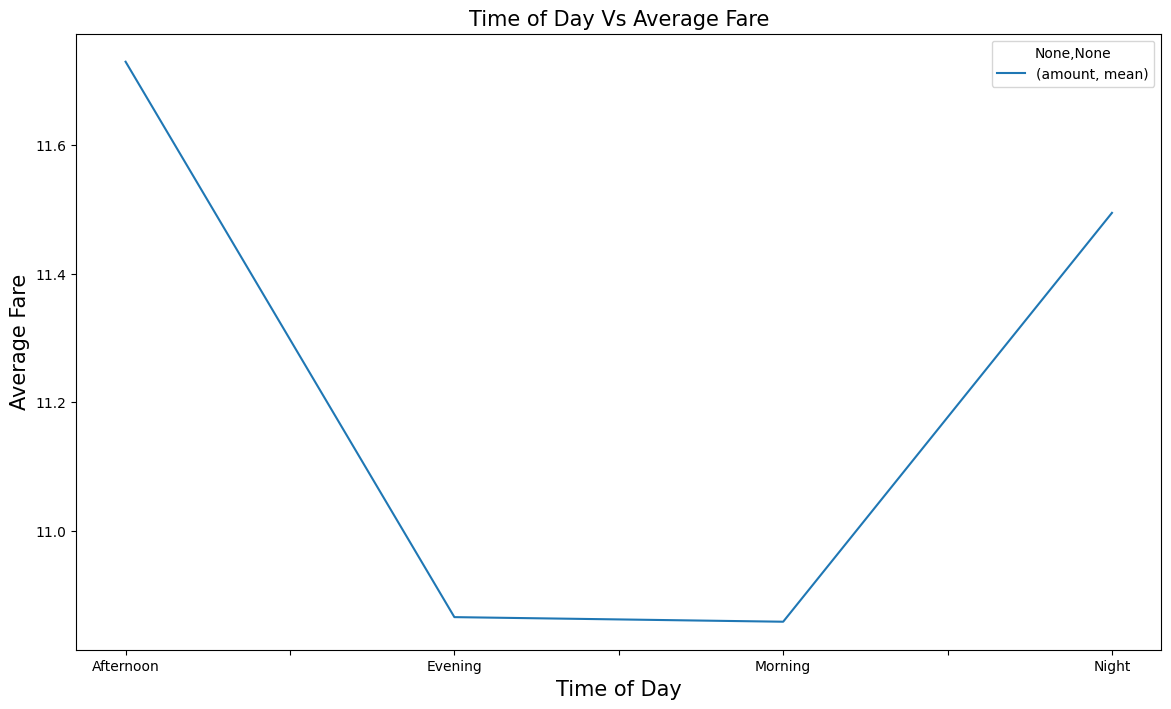

In [ ]:
Data_2.groupby(Data_2["time_of_day"]).agg({"amount":["mean"]}).plot(figsize=(14,8))
plt.title("Time of Day Vs Average Fare",fontsize=(15))
plt.xlabel("Time of Day",fontsize=(15))
plt.ylabel('Average Fare',fontsize=(15))


We have now divided the entire 24-hour period into four pieces.
Morning: 6 a.m. to 12 p.m.

Afternoon: 12 p.m. to 17 p.m.

Afternoon: 17 p.m. to 21 p.m.

Evening: 21 p.m. to 6 a.m.

In comparison to the other times, the fare is significantly higher in the afternoon and at night. This increase could be related to the unusual hours, as most cab firms impose a night premium so that drivers don't cancel rides and lose out on the odd hour incentives.



In [ ]:
Data_2.groupby(Data_2["day"]).agg({"amount":["mean"]})

,amount
,mean
day,
Friday,11.262035
Monday,11.454932
Saturday,11.050456
Sunday,11.425765
Thursday,11.509171
Tuesday,11.098784
Wednesday,10.984002


Text(0, 0.5, 'Average Fare')

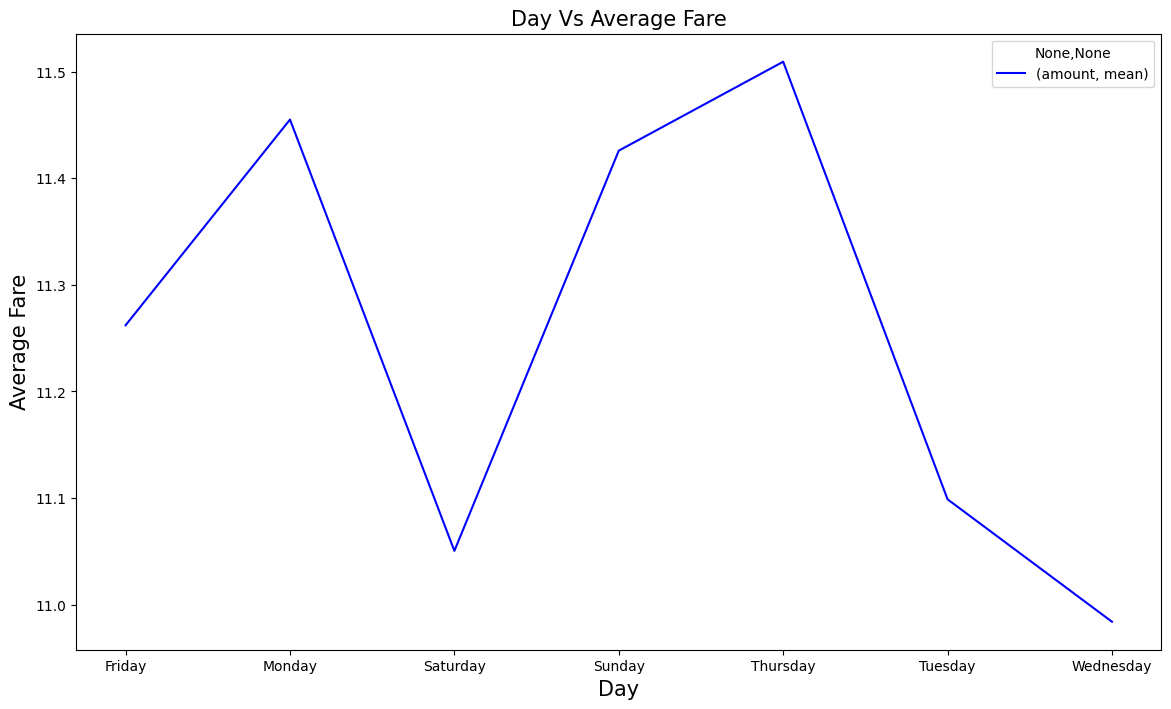

In [ ]:
Data_2.groupby(Data_2["day"]).agg({"amount":["mean"]}).plot(figsize=(14,8),color="blue")
plt.title("Day Vs Average Fare",fontsize=(15))
plt.xlabel("Day",fontsize=(15))
plt.ylabel('Average Fare',fontsize=(15))


We see an unusual pattern here, as the average fare on weekends should be lower than on other days. A portion of this can be seen in the Saturday drop in average fare. However, Sunday is the day when most people plan intercity journeys to shops and restaurants, so the small increase on Sunday could be related to that.

In [ ]:
Data_2.pivot_table(index='time_of_day', columns='day', values="no_of_passenger",aggfunc="count")

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
time_of_day,,,,,,,
Afternoon,1668,1620,1758,1631,1631,1671,1602
Evening,1727,1633,1602,1243,1729,1650,1698
Morning,1908,1753,1288,1074,1982,1894,1996
Night,2199,1494,2832,2427,1932,1551,1751


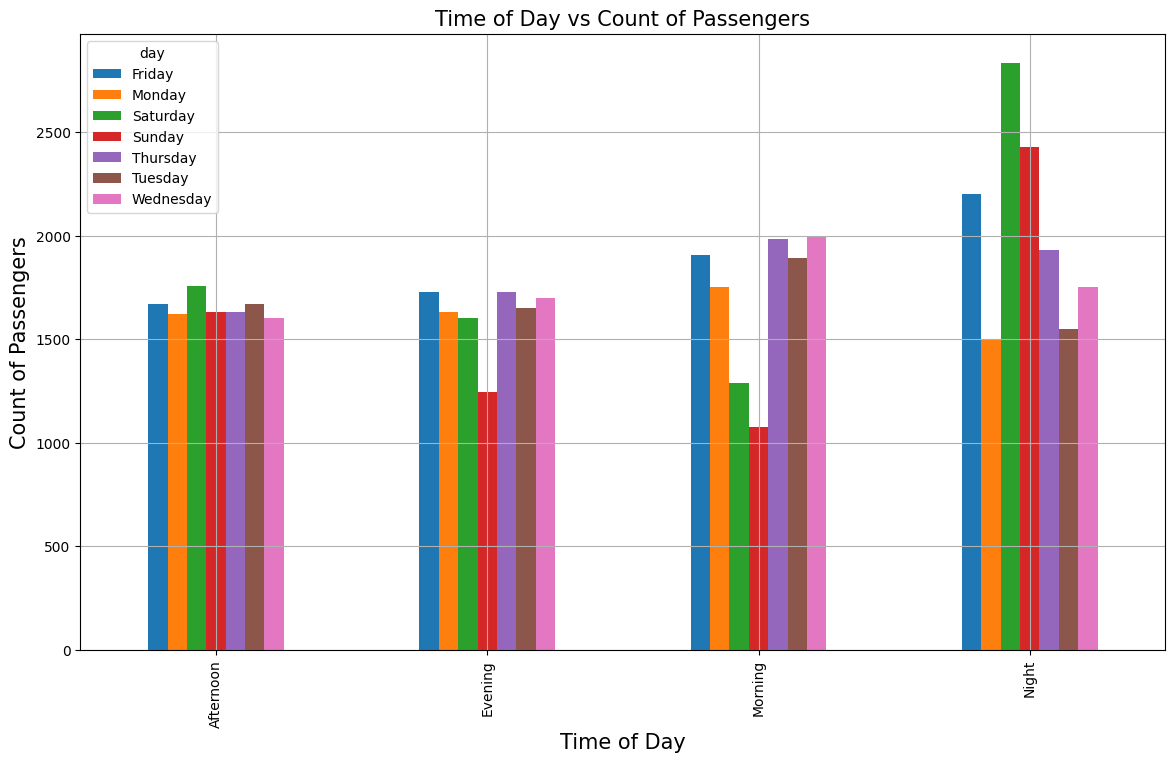

In [ ]:
Data_2.pivot_table(index='time_of_day', columns='day', values="no_of_passenger",aggfunc="count").plot(figsize=(14,8),kind='bar')
plt.title("Time of Day vs Count of Passengers",fontsize=(15))
plt.xlabel("Time of Day",fontsize=(15))
plt.ylabel('Count of Passengers',fontsize=(15));
plt.grid()


The suitable trend may be seen when looking at the time of day vs. the number of passengers on different days. The majority of passengers travelling at night do so on weekends, particularly on Saturday and Sunday, while for other times of day, particularly in the morning, less people use taxi services on Saturday and Sunday.

Text(0, 0.5, 'Average Fare')

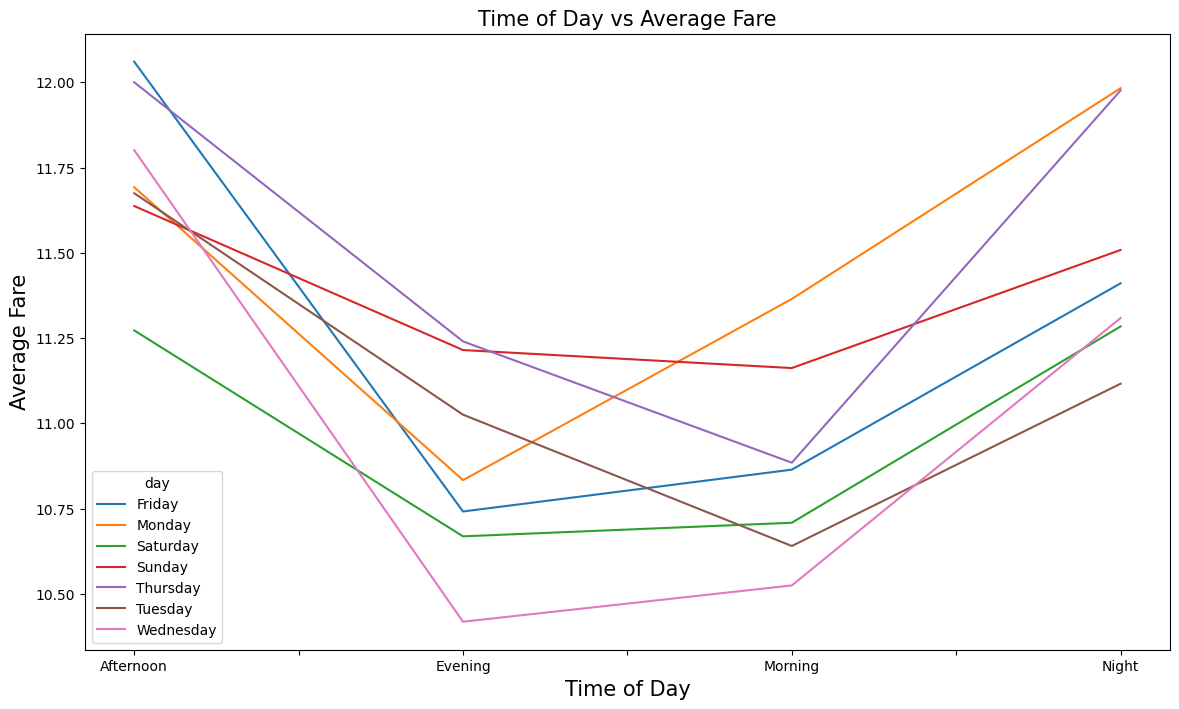

In [ ]:
Data_2.pivot_table(index='time_of_day', columns='day', values="amount",aggfunc="mean").plot(figsize=(14,8))
plt.title("Time of Day vs Average Fare",fontsize=(15))
plt.xlabel("Time of Day",fontsize=(15))
plt.ylabel('Average Fare',fontsize=(15))


It's merely a different version of the graph above. With respect to different days, time of day vs. average fare. Wednesday has the lowest average fare for evening and morning travel, while Friday and Monday have the highest average fare for afternoon and night travel.

In [ ]:
Data_2.pivot_table(index="day",values= "Distance_Travelled",aggfunc="mean")

,Distance_Travelled
day,
Friday,0.033239
Monday,0.035954
Saturday,0.033871
Sunday,0.036556
Thursday,0.034173
Tuesday,0.033094
Wednesday,0.032113


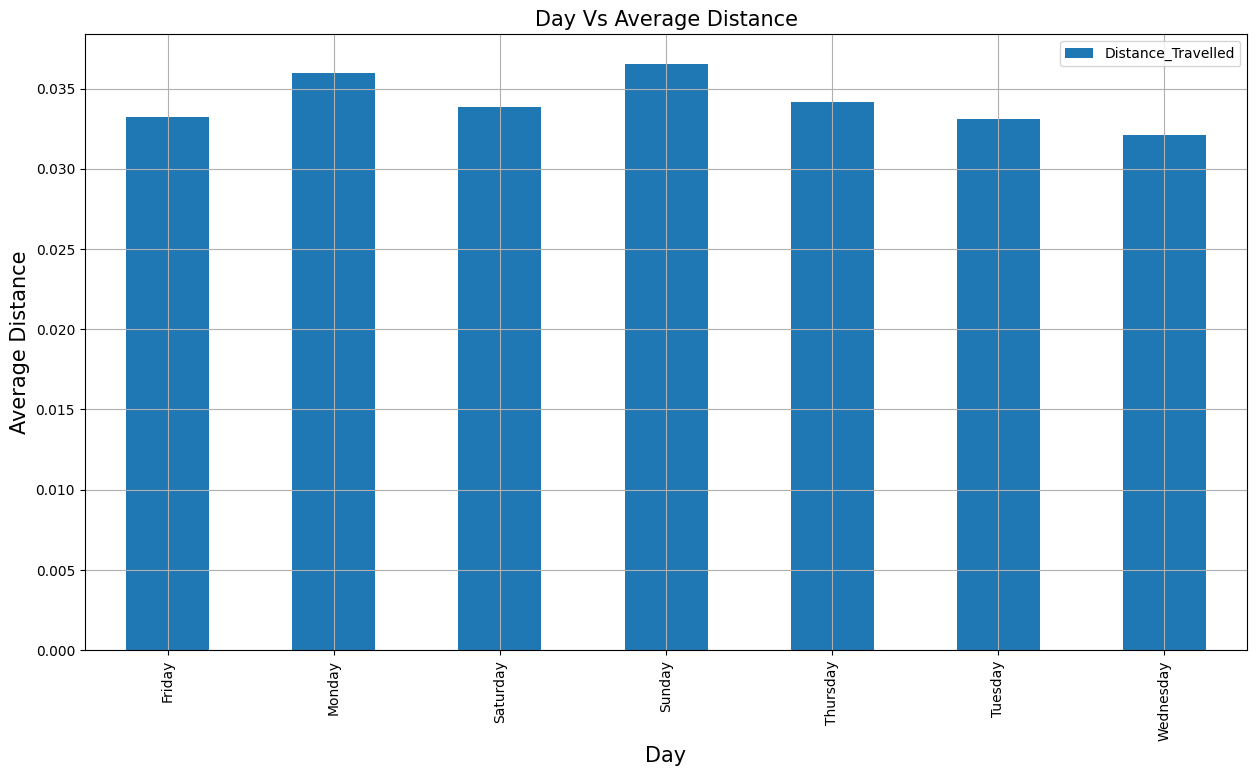

In [ ]:
Data_2.pivot_table(index="day",values= "Distance_Travelled",aggfunc="mean").plot(figsize=(15,8),kind='bar')
plt.title("Day Vs Average Distance",fontsize=(15))
plt.xlabel("Day",fontsize=(15))
plt.ylabel('Average Distance',fontsize=(15));
plt.grid()



In [ ]:
Data_2.pivot_table(index="year",values= "no_of_passenger",aggfunc="count")

,no_of_passenger
year,
2009,7611
2010,7458
2011,7624
2012,7812
2013,7666
2014,7390
2015,3383


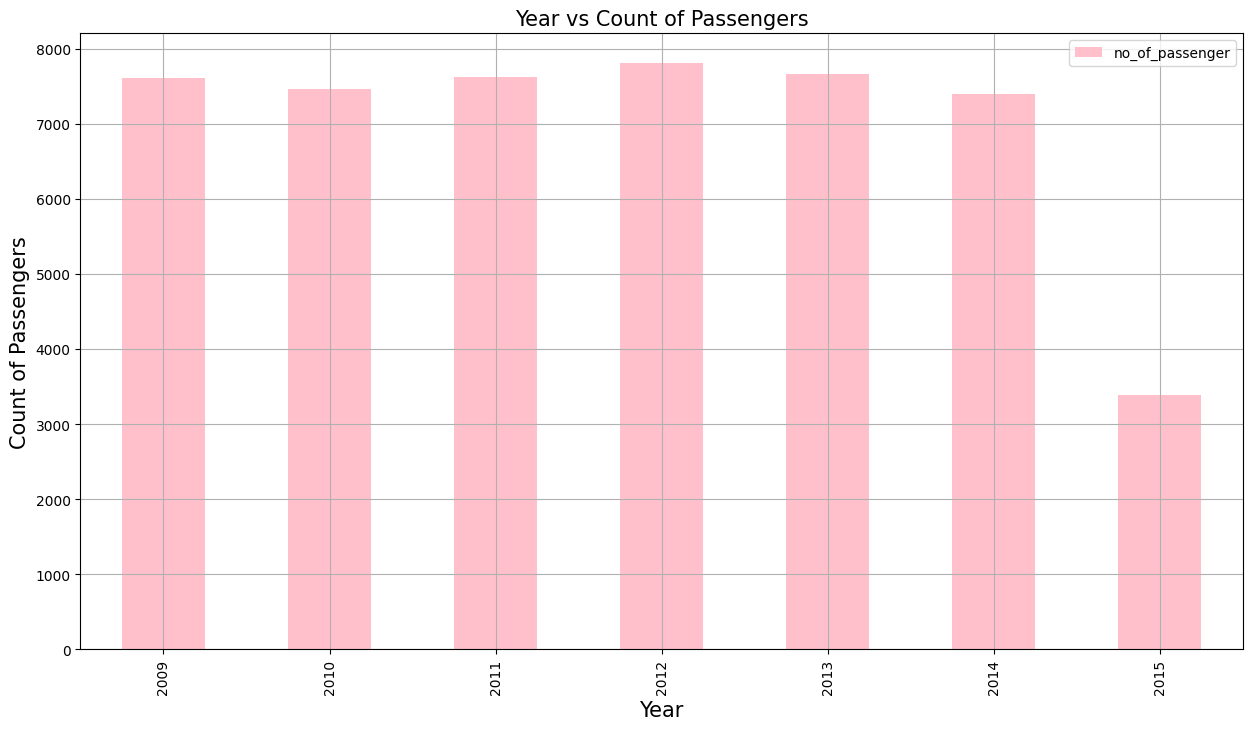

In [ ]:
Data_2.pivot_table(index="year",values= "no_of_passenger",aggfunc="count").plot(figsize=(15,8), kind='bar',color='pink')
plt.title("Year vs Count of Passengers",fontsize=(15))
plt.xlabel("Year",fontsize=(15))
plt.ylabel('Count of Passengers',fontsize=(15));
plt.grid()


In [ ]:
Data_2.pivot_table(index="year",columns="day",values="no_of_passenger",aggfunc="count")

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
year,,,,,,,
2009,1179,1032,1138,959,1162,1042,1099
2010,1178,920,1097,990,1127,1061,1085
2011,1185,1042,1168,934,1104,1053,1138
2012,1169,1026,1183,1061,1197,1052,1124
2013,1147,1048,1191,996,1129,1085,1070
2014,1121,984,1137,993,1078,1016,1061
2015,523,448,566,442,477,457,470


Text(0, 0.5, 'No_of_Passengers')

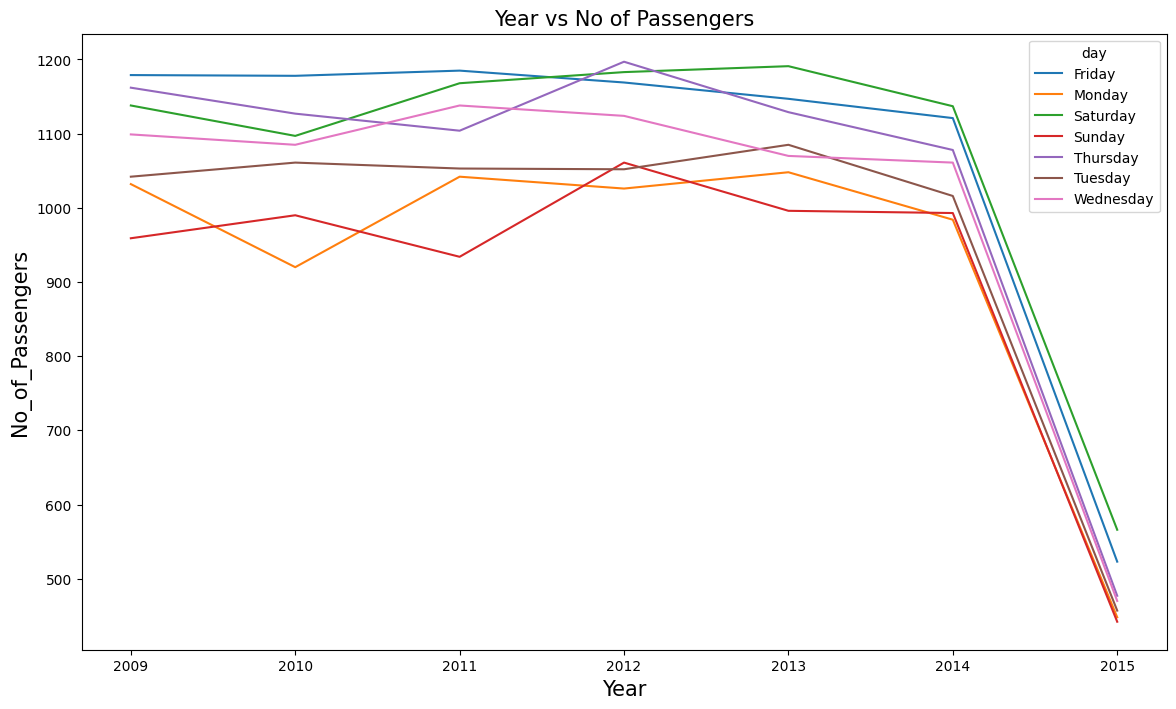

In [ ]:
Data_2.pivot_table(index="year",columns="day",values="no_of_passenger",aggfunc="count").plot(figsize=(14,8))
plt.title("Year vs No of Passengers",fontsize=(15))
plt.xlabel("Year",fontsize=(15))
plt.ylabel('No_of_Passengers',fontsize=(15))


The number of passengers is falling at the end of 2014, as seen in the graph above, and the trend of each day for the given years is similar.

# **Data Preprocessing**

In [ ]:
Data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48944 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   unique_id            48944 non-null  object             
 1   amount               48944 non-null  float64            
 2   date_time_of_pickup  48944 non-null  datetime64[ns, UTC]
 3   no_of_passenger      48944 non-null  int64              
 4   X1                   48944 non-null  float64            
 5   X2                   48944 non-null  float64            
 6   Y1                   48944 non-null  float64            
 7   Y2                   48944 non-null  float64            
 8   Distance_Travelled   48944 non-null  float64            
 9   date                 48944 non-null  datetime64[ns]     
 10  Time                 48944 non-null  object             
 11  Zone                 48944 non-null  object             
 12  hours             

In [ ]:
Data_2.select_dtypes(include='O').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48944 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   unique_id    48944 non-null  object
 1   Time         48944 non-null  object
 2   Zone         48944 non-null  object
 3   time_of_day  48944 non-null  object
 4   day          48944 non-null  object
dtypes: object(5)
memory usage: 2.2+ MB


In [ ]:
Data_2.drop(columns=['unique_id','Time','Zone','date','min','second','date_time_of_pickup','X1','X2','Y1','Y2'], inplace=True)

In [ ]:
Data_2.head()

,amount,no_of_passenger,Distance_Travelled,hours,year,day_of_the_month,time_of_day,day,day_no,manhattan_d
0,4.5,1,0.009436,17,2009,15,Evening,Monday,0,0.011742
1,16.9,1,0.079696,16,2010,5,Afternoon,Tuesday,1,0.107481
2,5.7,2,0.013674,0,2011,18,Night,Thursday,3,0.019212
3,7.7,1,0.025340,4,2012,21,Night,Saturday,5,0.029386
4,5.3,1,0.019470,7,2010,9,Morning,Tuesday,1,0.027194


In [ ]:
Data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48944 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   amount              48944 non-null  float64
 1   no_of_passenger     48944 non-null  int64  
 2   Distance_Travelled  48944 non-null  float64
 3   hours               48944 non-null  int64  
 4   year                48944 non-null  int64  
 5   day_of_the_month    48944 non-null  int64  
 6   time_of_day         48944 non-null  object 
 7   day                 48944 non-null  object 
 8   day_no              48944 non-null  int64  
 9   manhattan_d         48944 non-null  float64
dtypes: float64(3), int64(5), object(2)
memory usage: 4.1+ MB


In [ ]:
# One Hot Encoding for Categorical Columns

Data_2_new=pd.get_dummies(Data_2, columns=['time_of_day', 'day'])

In [ ]:
Data_2_new

,amount,no_of_passenger,Distance_Travelled,hours,year,day_of_the_month,day_no,manhattan_d,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,4.5,1,0.009436,17,2009,15,0,0.011742,0,1,0,0,0,1,0,0,0,0,0
1,16.9,1,0.079696,16,2010,5,1,0.107481,1,0,0,0,0,0,0,0,0,1,0
2,5.7,2,0.013674,0,2011,18,3,0.019212,0,0,0,1,0,0,0,0,1,0,0
3,7.7,1,0.025340,4,2012,21,5,0.029386,0,0,0,1,0,0,1,0,0,0,0
4,5.3,1,0.019470,7,2010,9,1,0.027194,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,1,0.045782,23,2013,12,2,0.059464,0,0,0,1,0,0,0,0,0,0,1
49996,7.5,1,0.008049,17,2015,22,0,0.010223,0,1,0,0,0,1,0,0,0,0,0
49997,6.9,1,0.020574,4,2011,30,6,0.024645,0,0,0,1,0,0,0,1,0,0,0
49998,4.5,2,0.007686,7,2012,6,1,0.009508,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
Data_2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48944 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount                 48944 non-null  float64
 1   no_of_passenger        48944 non-null  int64  
 2   Distance_Travelled     48944 non-null  float64
 3   hours                  48944 non-null  int64  
 4   year                   48944 non-null  int64  
 5   day_of_the_month       48944 non-null  int64  
 6   day_no                 48944 non-null  int64  
 7   manhattan_d            48944 non-null  float64
 8   time_of_day_Afternoon  48944 non-null  uint8  
 9   time_of_day_Evening    48944 non-null  uint8  
 10  time_of_day_Morning    48944 non-null  uint8  
 11  time_of_day_Night      48944 non-null  uint8  
 12  day_Friday             48944 non-null  uint8  
 13  day_Monday             48944 non-null  uint8  
 14  day_Saturday           48944 non-null  uint8  
 15  da

In [ ]:
Data_2_new.shape

(48944, 19)

In [ ]:
Data_2_new["Is_Weekend"] =np.where(Data_2_new["day_no"].isin ([0,6]),1,0)
Data_2_new["Is_starting_of_month"] = np.where(Data_2_new["day_of_the_month"].isin ([1,2,3,4,5,6,7,8,9,10]),1,0)
Data_2_new["Is_middle_of_month"] = np.where(Data_2_new["day_of_the_month"].isin (range(11,21)),1,0)
Data_2_new["Is_end_of_month"] = np.where(Data_2_new["day_of_the_month"].isin (range(21,32)),1,0)
Data_2_new["Is_leap_year"] = np.where((Data_2_new["year"]%4 == 0),1,0)

In [ ]:
Data_2_new['Is_Weekend']

0        1
1        0
2        0
3        0
4        0
        ..
49995    0
49996    1
49997    1
49998    0
49999    0
Name: Is_Weekend, Length: 48944, dtype: int64

In [ ]:
Data_2_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48944 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount                 48944 non-null  float64
 1   no_of_passenger        48944 non-null  int64  
 2   Distance_Travelled     48944 non-null  float64
 3   hours                  48944 non-null  int64  
 4   year                   48944 non-null  int64  
 5   day_of_the_month       48944 non-null  int64  
 6   day_no                 48944 non-null  int64  
 7   manhattan_d            48944 non-null  float64
 8   time_of_day_Afternoon  48944 non-null  uint8  
 9   time_of_day_Evening    48944 non-null  uint8  
 10  time_of_day_Morning    48944 non-null  uint8  
 11  time_of_day_Night      48944 non-null  uint8  
 12  day_Friday             48944 non-null  uint8  
 13  day_Monday             48944 non-null  uint8  
 14  day_Saturday           48944 non-null  uint8  
 15  da

# **Applying the Model**

In [ ]:
y=Data_2_new['amount']
X=Data_2_new.drop(columns=['amount'])

In [ ]:
cor_data=X.corr()
cor_data.style.background_gradient(cmap='coolwarm')

,no_of_passenger,Distance_Travelled,hours,year,day_of_the_month,day_no,manhattan_d,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,Is_Weekend,Is_starting_of_month,Is_middle_of_month,Is_end_of_month,Is_leap_year
no_of_passenger,1.000000,0.016398,0.013628,-0.006069,0.006858,0.048013,0.013451,-0.006126,0.015378,-0.049548,0.038305,0.004191,-0.013072,0.038293,0.030675,-0.023507,-0.022525,-0.014359,0.013374,-0.005853,-0.002992,0.008815,-0.002681
Distance_Travelled,0.016398,1.000000,-0.034170,0.026332,-0.000365,0.007823,0.936067,-0.005242,-0.030578,-0.032687,0.064199,-0.009436,0.019182,-0.002380,0.025075,0.000966,-0.010404,-0.021211,0.033954,-0.000431,0.003131,-0.002712,0.002067
hours,0.013628,-0.034170,1.000000,0.005022,-0.007159,-0.091323,-0.031199,0.037338,0.426330,-0.405137,-0.047724,0.006408,0.028591,-0.028032,-0.097366,0.027309,0.035515,0.025279,-0.052394,0.005809,-0.001271,-0.004495,-0.002412
year,-0.006069,0.026332,0.005022,1.000000,-0.011311,0.006056,0.016878,-0.010090,-0.001731,0.002923,0.008295,-0.004908,0.002549,0.010345,0.005902,-0.007050,-0.001478,-0.005092,0.006476,0.007664,0.002955,-0.010577,0.060997
day_of_the_month,0.006858,-0.000365,-0.007159,-0.011311,1.000000,0.007631,0.000328,0.010268,-0.010280,-0.001329,0.001180,0.005378,-0.000912,0.009001,0.001974,-0.008262,-0.002896,-0.004537,0.000806,-0.808469,-0.014775,0.817916,-0.003540
day_no,0.048013,0.007823,-0.091323,0.006056,0.007631,1.000000,0.006493,-0.002059,-0.039290,-0.090168,0.123646,0.210759,-0.606201,0.427476,0.587274,-0.006579,-0.415721,-0.216072,-0.018303,-0.007816,0.004322,0.003429,0.004884
manhattan_d,0.013451,0.936067,-0.031199,0.016878,0.000328,0.006493,1.000000,-0.004535,-0.026980,-0.025346,0.053256,-0.008657,0.017466,-0.000400,0.020642,0.000306,-0.009647,-0.018205,0.029242,-0.002388,0.003850,-0.001489,-0.000411
time_of_day_Afternoon,-0.006126,-0.005242,0.037338,-0.010090,0.010268,-0.002059,-0.004535,1.000000,-0.304715,-0.315461,-0.355676,-0.014292,0.011614,-0.001590,0.017506,-0.012184,0.009756,-0.008961,0.022334,-0.003855,-0.008329,0.012183,-0.007935
time_of_day_Evening,0.015378,-0.030578,0.426330,-0.001731,-0.010280,-0.039290,-0.026980,-0.304715,1.000000,-0.310124,-0.349658,-0.000306,0.019255,-0.016476,-0.032645,0.007130,0.012703,0.010171,-0.010114,0.007754,0.002288,-0.009998,-0.000229
time_of_day_Morning,-0.049548,-0.032687,-0.405137,0.002923,-0.001329,-0.090168,-0.025346,-0.315461,-0.310124,1.000000,-0.361990,0.011209,0.024324,-0.070150,-0.067273,0.028682,0.034454,0.038446,-0.032679,-0.001018,0.006096,-0.005102,-0.000595


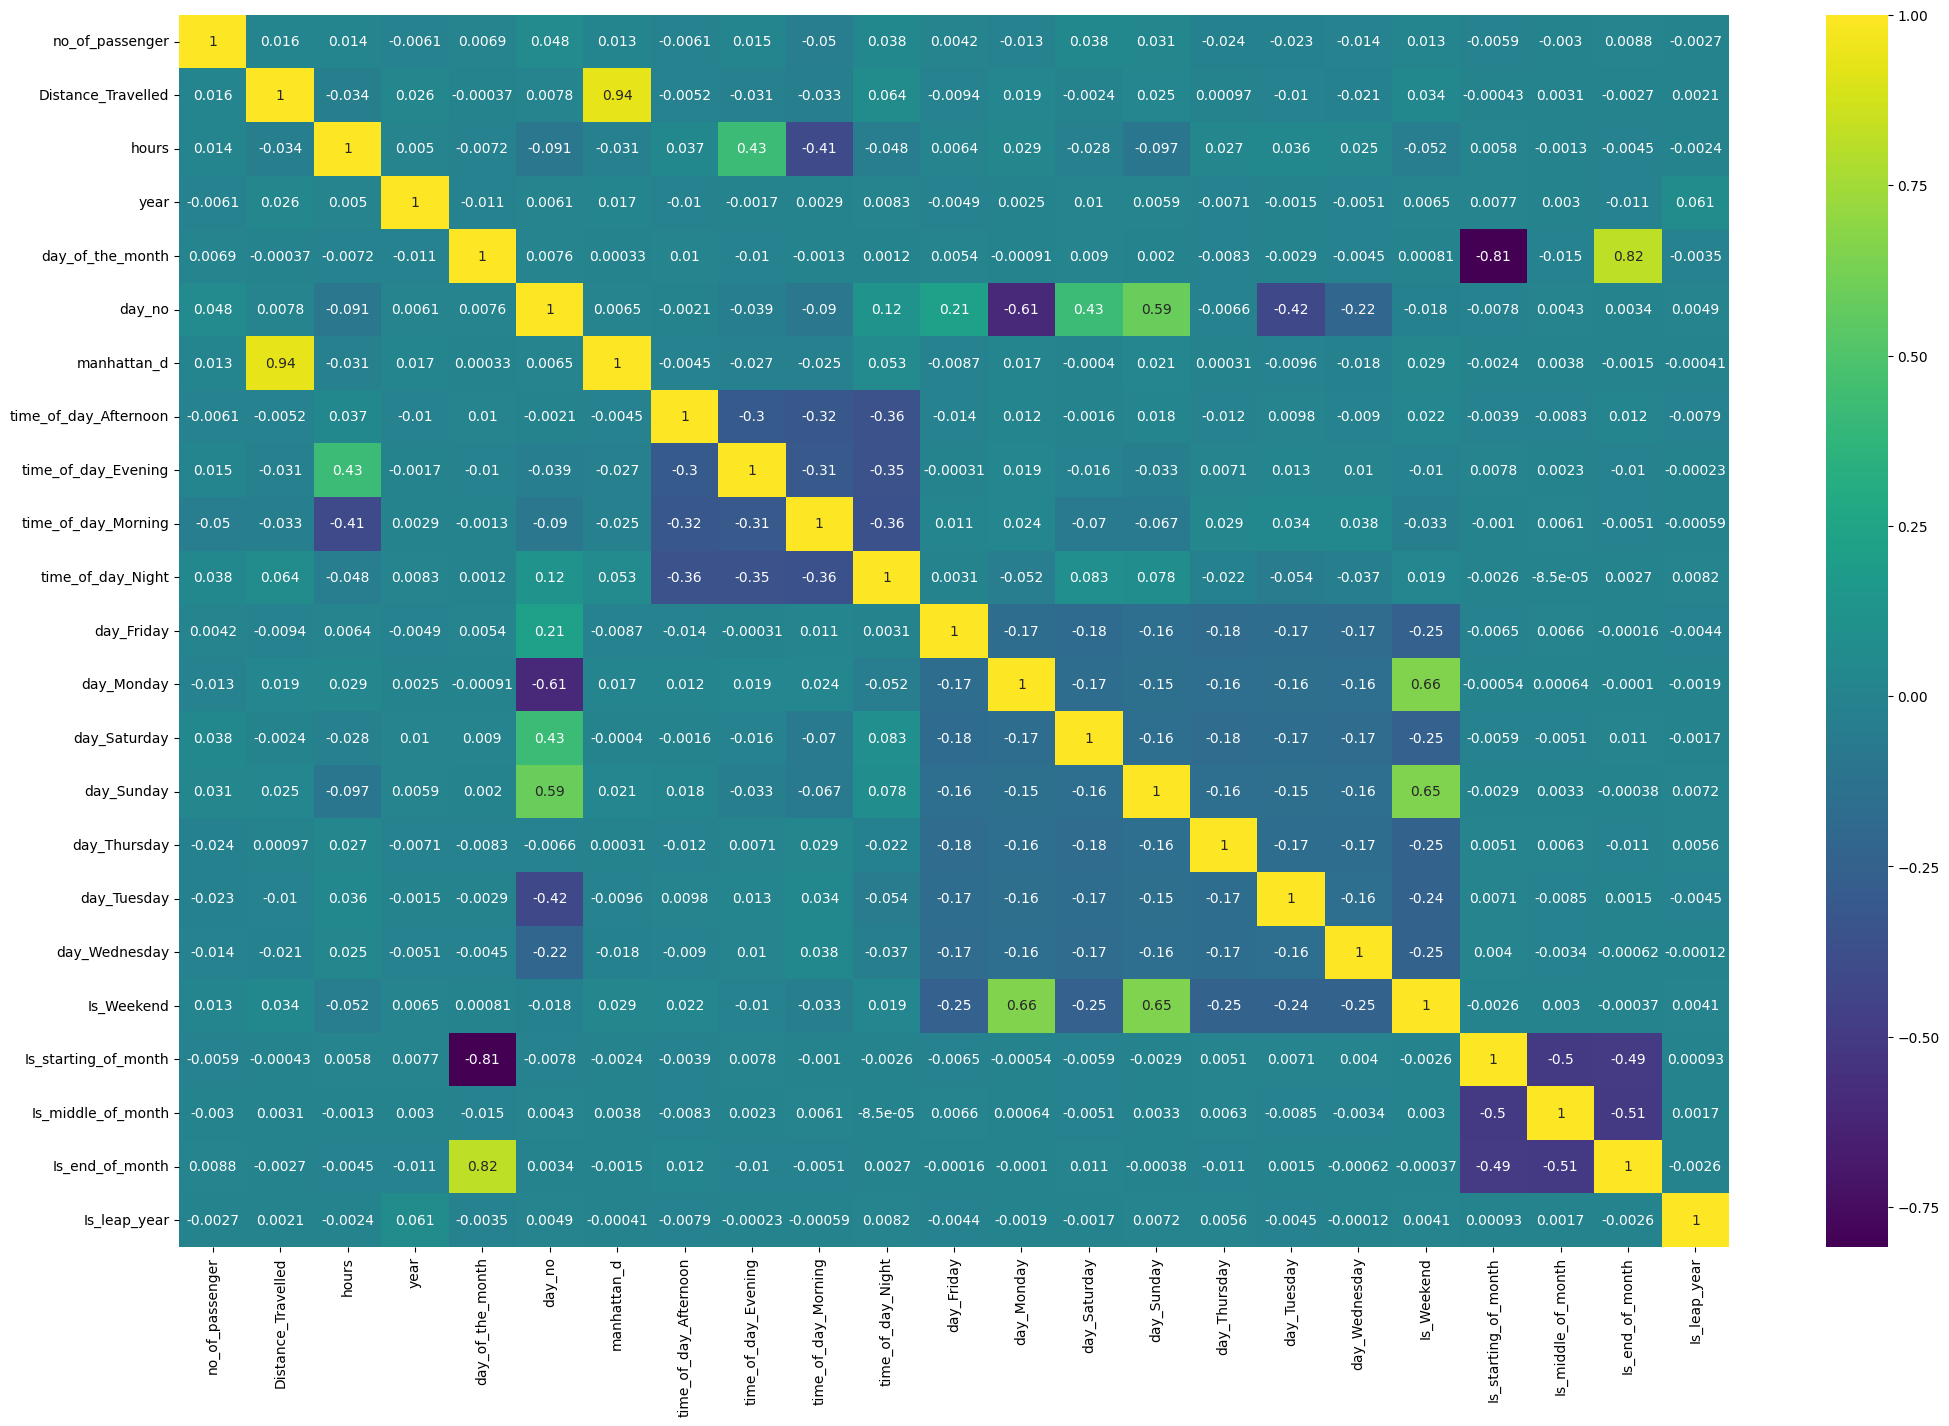

In [ ]:
plt.figure(figsize=(25,16))
sns.heatmap(cor_data, annot=True, cmap='viridis')
plt.show()

In [ ]:
#Splitting the dataset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39155 entries, 20390 to 16145
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   no_of_passenger        39155 non-null  int64  
 1   Distance_Travelled     39155 non-null  float64
 2   hours                  39155 non-null  int64  
 3   year                   39155 non-null  int64  
 4   day_of_the_month       39155 non-null  int64  
 5   day_no                 39155 non-null  int64  
 6   manhattan_d            39155 non-null  float64
 7   time_of_day_Afternoon  39155 non-null  uint8  
 8   time_of_day_Evening    39155 non-null  uint8  
 9   time_of_day_Morning    39155 non-null  uint8  
 10  time_of_day_Night      39155 non-null  uint8  
 11  day_Friday             39155 non-null  uint8  
 12  day_Monday             39155 non-null  uint8  
 13  day_Saturday           39155 non-null  uint8  
 14  day_Sunday             39155 non-null  uint8  
 15

<Axes: ylabel='Density'>

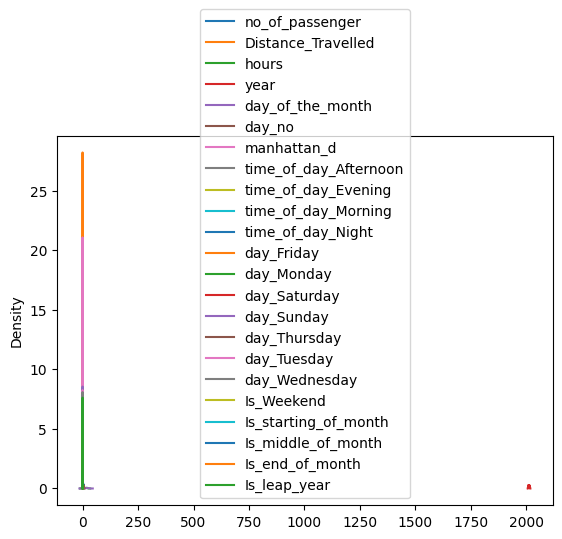

In [ ]:
X_train.plot.kde()

In [ ]:
ss=StandardScaler()
X_train_new=ss.fit_transform(X_train,y_train)

In [ ]:
X_train_new.shape

(39155, 23)

In [ ]:
X_train_final=pd.DataFrame(data=X_train_new, columns=X_train.columns)

<Axes: ylabel='Density'>

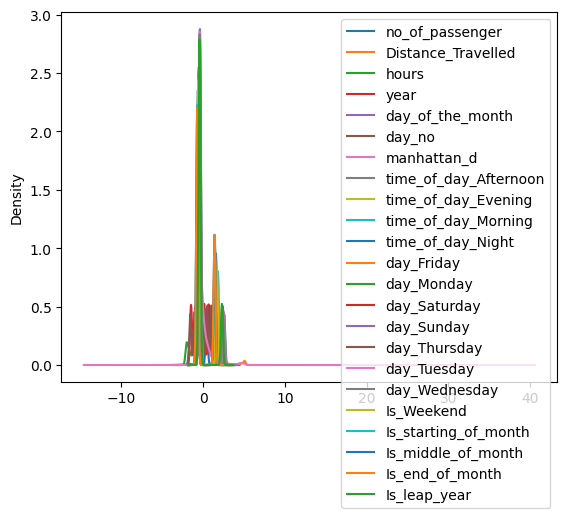

In [ ]:
X_train_final.plot.kde()

In [ ]:
X_train_final_matrix = X_train_final.describe().T
X_train_final_matrix

,count,mean,std,min,25%,50%,75%,max
no_of_passenger,39155.0,4.858838e-17,1.000013,-1.562520,-0.562365,-0.562365,0.437790,2.438099
Distance_Travelled,39155.0,9.654163e-17,1.000013,-0.893759,-0.555719,-0.320920,0.126555,5.095760
hours,39155.0,-1.088815e-17,1.000013,-2.072799,-0.687801,0.081643,0.851086,1.466641
year,39155.0,-1.459013e-15,1.000013,-1.469139,-0.934081,0.136036,0.671095,1.741212
day_of_the_month,39155.0,1.669517e-17,1.000013,-1.693449,-0.884876,0.039207,0.847779,1.771862
day_no,39155.0,-8.274996e-17,1.000013,-1.550707,-1.039605,-0.017400,1.004805,1.515907
manhattan_d,39155.0,-6.151807e-17,1.000013,-0.798302,-0.502565,-0.294760,0.118610,26.765493
time_of_day_Afternoon,39155.0,3.701972e-17,1.000013,-0.558324,-0.558324,-0.558324,-0.558324,1.791076
time_of_day_Evening,39155.0,-6.424010e-17,1.000013,-0.545722,-0.545722,-0.545722,-0.545722,1.832435
time_of_day_Morning,39155.0,-1.293876e-16,1.000013,-0.567647,-0.567647,-0.567647,-0.567647,1.761658


<Axes: ylabel='Density'>

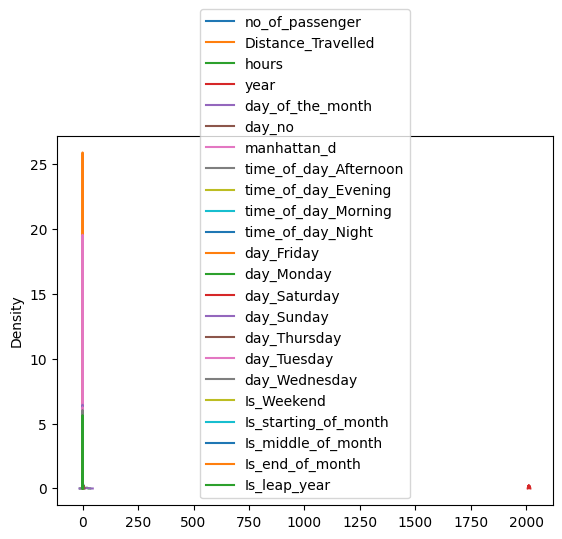

In [ ]:
X_test.plot.kde()

In [ ]:
ss=StandardScaler()
X_test_new=ss.fit_transform(X_test,y_test)

In [ ]:
X_test_final=pd.DataFrame(data=X_test_new, columns=X_test.columns)

<Axes: ylabel='Density'>

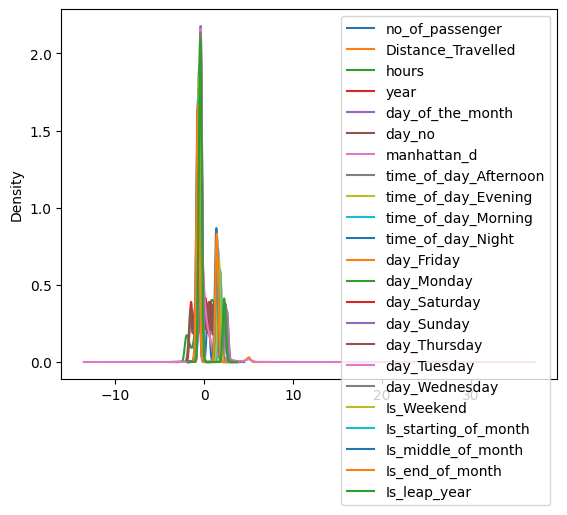

In [ ]:
X_test_final.plot.kde()

In [ ]:
X_test_matrix = X_test.describe().T
X_test_matrix

,count,mean,std,min,25%,50%,75%,max
no_of_passenger,9789.0,1.552968,0.990958,0.0,1.000000,1.000000,2.000000,4.000000
Distance_Travelled,9789.0,0.034205,0.038255,0.0,0.012842,0.021898,0.039781,0.228218
hours,9789.0,13.540300,6.523975,0.0,9.000000,14.000000,19.000000,23.000000
year,9789.0,2011.711615,1.850427,2009.0,2010.000000,2012.000000,2013.000000,2015.000000
day_of_the_month,9789.0,15.674022,8.670622,1.0,8.000000,16.000000,23.000000,31.000000
day_no,9789.0,3.017877,1.956564,0.0,1.000000,3.000000,5.000000,6.000000
manhattan_d,9789.0,0.044445,0.052265,0.0,0.016393,0.028193,0.051895,1.323713
time_of_day_Afternoon,9789.0,0.232506,0.422451,0.0,0.000000,0.000000,0.000000,1.000000
time_of_day_Evening,9789.0,0.234651,0.423802,0.0,0.000000,0.000000,0.000000,1.000000
time_of_day_Morning,9789.0,0.240372,0.427331,0.0,0.000000,0.000000,0.000000,1.000000


In [ ]:
X_train_final_matrix.to_excel("X_train.xlsx")
X_test_matrix.to_excel("X_test.xlsx")

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
scre = rfr.score(X_train, y_train)
print("Validation set score:", scre)

Validation set score: 0.9749407799687335


In [ ]:
y_pred = rfr.predict(X_test)
r2score = r2_score(y_test, y_pred)
print("R2 Score is:", r2score)

mae = mean_absolute_error(y_test, y_pred)
print("MAE is:", mae)

mse = mean_squared_error(y_test, y_pred)
print("RMSE is:", mse**(1/2))

R2 Score is: 0.8417090735724452
MAE is: 2.003127803316648
RMSE is: 3.565067978076933


In [ ]:
#using hyperparameter tuning with Grid search CV
param = {
    "n_estimators":[20,50],
    "criterion":["squared_error"],
    "max_depth":[3,5],
    "min_samples_split":[2,4],
    "min_samples_leaf":[2,4]
}

rgr = GridSearchCV(estimator = rfr, cv=5, param_grid=param, verbose=1, n_jobs=-1)
rgr.fit(X_train, y_train)
scre = rgr.score(X_train, y_train)
print("Validation set score:", scre)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Validation set score: 0.8239230681134938


In [ ]:
rgr.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 50}

In [ ]:
y_pred = rgr.predict(X_test)
r2score = r2_score(y_test, y_pred)
print("R2 Score is:", r2score)

mae = mean_absolute_error(y_test, y_pred)
print("MAE is:", mae)

mse = mean_squared_error(y_test, y_pred)
print("RMSE is:", mse**(1/2))

R2 Score is: 0.8368195751983725
MAE is: 2.071586752216941
RMSE is: 3.6197104747944056
